In [1]:
import os
import sys
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch import nn
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.datasets import DatasetFolder, ImageFolder


def no_axis_show(img, title='', cmap=None):
  # imshow, 縮放模式為nearest。
  fig = plt.imshow(img, interpolation='nearest', cmap=cmap)
  # 不要显示axis
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.title(title)


titles = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
plt.figure(figsize=(32, 32))

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

In [2]:
def source_transform(imge):
  # 转灰色: Canny 不吃 RGB。
  img = T.functional.to_grayscale(imge)
  # cv2 不吃 skimage.Image，因此转成np.array后再做cv2.Canny
  img = cv2.Canny(np.array(img), 170, 300)
  # 重新np.array 转回 skimage.Image
  img = Image.fromarray(np.array(img))
  # 随机水平翻转 (Augmentation)
  RHF = T.RandomHorizontalFlip(0.5)
  img = RHF(img)
  # 旋转15度内 (Augmentation)，旋转后空的地方补0
  RR = T.RandomRotation(15, fill=(0,))
  img = RR(img)
  # 最后Tensor供model使用。
  tensor = T.ToTensor()

  return tensor(img)

In [3]:
target_transform = T.Compose([
  # 转灰阶:
  T.Grayscale(),
  # 缩放: 因为source data是32x32，我们把target data的28x28放大成32x32。
  T.Resize((32, 32)),
  # 随机水平翻转(Augmentation)
  T.RandomHorizontalFlip(0.5),
  # 旋转15度内 (Augmentation)，旋转后空的地方补0
  T.RandomRotation(15, fill=(0,)),
  # 最后Tensor供model使用。
  T.ToTensor(),
])

In [4]:
# 生成数据集
source_dataset = ImageFolder('./train_data', transform=source_transform)  # DatasetFolder 用于读取训练集，读取的时候图片和标签
target_dataset = ImageFolder('./test_data', transform=target_transform)  # ImageFolder 用于读取测试集，读取的时候只有图片
# 数据加载器定义
source_dataloader = DataLoader(source_dataset, batch_size=50, shuffle=True)
target_dataloader = DataLoader(target_dataset, batch_size=50, shuffle=True)
test_dataloader = DataLoader(target_dataset, batch_size=100, shuffle=False)

=============source_dataset=============
image shape: torch.Size([1, 32, 32]), label: 0
训练集数量: 4500
图片： tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
标签： 0


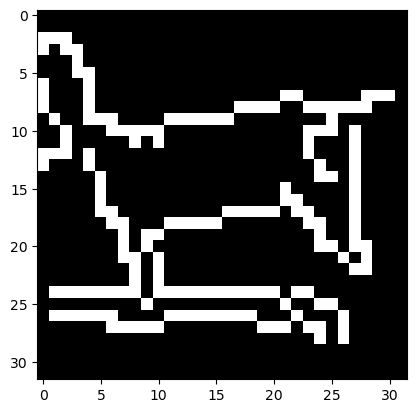

In [5]:
%matplotlib inline
# 展示生成并经过预处理的的source_dataset和source_loader
print('=============source_dataset=============')
#由于使用了DatasetFolder，训练集这里有图片和标签两个参数image,label
for image, label in source_dataset:
    print('image shape: {}, label: {}'.format(image.shape,label))
    print('训练集数量:',len(source_dataset))
    print('图片：',image)
    print('标签：',label)
    plt.imshow(image.numpy().squeeze(),cmap='gray')
    break

In [6]:
#source_loader的信息    
print('=============source_dataloader=============')
for batch_id, (data,label) in enumerate(source_dataloader):
    print('一个batch的图片：',data.shape)    # 索引[0]存放图片
    print('一个batch的标签个数：',label.shape)   #索引[1]存放标签
    print('图片：',data[0].shape) 
    break
# no_axis_show(x_data.numpy().squeeze(),title='process image', cmap='gray')

=============source_dataloader=============
一个batch的图片： torch.Size([50, 1, 32, 32])
一个batch的标签个数： torch.Size([50])
图片： torch.Size([1, 32, 32])


=============target_dataset=============
image shape: torch.Size([1, 32, 32])
测试集数量: 100000
图片： tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


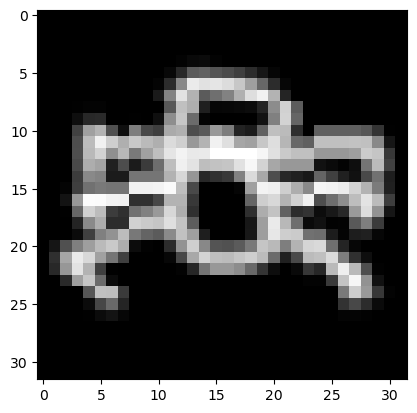

In [7]:
# 展示生成并经过预处理的target_dataset和target_dataloader
print('=============target_dataset=============')
for image_,_ in target_dataset:
    print('image shape: {}'.format(image_.shape))
    print('测试集数量:',len(target_dataset))
    plt.imshow(image_.numpy().squeeze(),cmap='gray')
    print('图片：',image_)
    break

In [8]:
#target_dataloader的信息    
print('=============target_dataloader=============')
for batch_id, (data_1,label_1) in enumerate(target_dataloader):
    # print('一个batch的图片：',data[0].shape)
    print('一个batch的图片：',data_1.shape)
    print('一张图片的形状：',data_1[0].shape) 
    print(label_1)
    break

=============target_dataloader=============
一个batch的图片： torch.Size([50, 1, 32, 32])
一张图片的形状： torch.Size([1, 32, 32])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
